334650


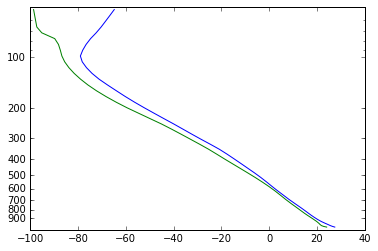

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4

WRFOUT_FILE_PATH = 'wrfout_d01_2017-09-09_12:00:00'

dataset = netCDF4.Dataset(WRFOUT_FILE_PATH, 'r')




# 3D mositure - QVAPOR
# Read the data into a NumPy array
QVAPOR = dataset.variables['QVAPOR'][:]
print(QVAPOR.size)
LAT_INDEX =0 # This is the south_north dimension in the NetCDF file
LON_INDEX=0 # This is the west-east dimension in the NetCDF File

# How many levels are there ? Use the bottom_top dimension
# num_levels = dataset.dimensions['bottom_top'].size
# print(str(num_levels))

# levels = np.arange(num_levels)
# plt.plot(QVAPOR[0,:,LAT_INDEX,LON_INDEX], levels)



# Let's get the P and PB arrays
P = dataset.variables['P'][:] # the perturbation pressure
PB = dataset.variables['PB'][:] # the base state pressure

# Create the total pressure millibar field
P_mb = (P + PB) * 0.01

# let's get the 3d array of temperature in degrees C
theta = dataset.variables['T'][:] + 300.0 # convert petrubation potential temperature in Kelvin
T_c = theta*((P_mb)/1000.0)**(2.0/7.0) -273.0

# let's get the dew point
# As per the formula dewpoint T = B/ln(X) where X = Ae/wp
A = 2.53 * (10**9) # coversion from 1 kPa = 10 mbar
B = 5.42 * (10**3)
e = 0.622
w = QVAPOR
p = P_mb  

x= (A*e)/(w*p)
T_d = B / (np.log(0.622 * 2.53 * (10**9)/np.multiply(QVAPOR,P_mb)))
T_d = T_d - 273.15 #convert to celsius

# Plot a low level contour for a sanity check
#Try the pressure contours again with more contours
# clevels = np.arange(950.0, 1051.0, 5.0)
# CS = plt.contour(P_mb[0,1, :, :], levels = clevels)
# plt.clabel(CS, inline =True)


#From above, I already have P_mb and QVAPOR, and have defined the 
# point LAT_INDEX and LON_INDEX

#Get the pressure levels for the lat/lon indices
# plevels = P_mb[0,:,LAT_INDEX, LON_INDEX]
# plt.semilogy(QVAPOR[0,:,LAT_INDEX, LON_INDEX], plevels)
# plt.gca().invert_yaxis()

# plt.contourf(T_c[0,0,:,:])
# plt.title("Level 0 T (degC)")
# plt.colorbar()

#Vertical plot
t_sounding = T_c[0,:,LAT_INDEX,LON_INDEX]
t_d_sounding = T_d[0,:,LAT_INDEX,LON_INDEX]
p_sounding = P_mb[0,:,LAT_INDEX,LON_INDEX]
plt.semilogy(t_sounding, p_sounding)
plt.semilogy(t_d_sounding, p_sounding, color='green')
plt.ylim(ymin=50.0, ymax=1050.0)
plt.gca().invert_yaxis()

#Set up ticks and labels on the y-axis
ylocations = np.arange(100,1000,100)
plt.yticks(ylocations, ylocations)

plt.show()
dataset.close()
